In [1]:
from algorithms import SARSA, DynaQ
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import trange
from tqdm.contrib.concurrent import process_map
import multiprocessing
import numpy as np

In [2]:
def run_SARSA(with_n: float):
    # 3-dimensions of 101 possible values (0, 100 inclusive), with 3 different possible actions
    # States are hashable by those three attributes, and thus a defaultdict is suitable
    Q = defaultdict(lambda: [0.5, 0.5, 0.5])
    n = with_n
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.01

    num_episodes = 100

    States = []

    for i in trange(num_episodes):
        (States, Q) = SARSA(Q, epsilon, alpha, gamma, n)
    return (States, Q)
ns = [run_SARSA(n) for n in [0, 1, 8, 64]]


  0%|          | 0/100 [00:01<?, ?it/s]


IndexError: list index out of range

Text(0.5, 1.0, 'n-step SARSA for Cryptocurrency')

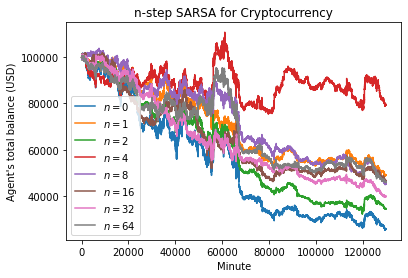

In [23]:
for i, result_tuple in enumerate(ns):
    States = result_tuple[0]
    plt.plot([s.total_balance for s in States], label=f"$n = ${[0, 1, 2, 4, 8, 16, 32, 64][i]}")

plt.legend()
plt.ylabel("Agent's total balance (USD)")
plt.xlabel("Minute")
plt.title("n-step SARSA for Cryptocurrency")

In [13]:

alpha = 0.5
gamma = 0.8
epsilon = 0.05
n_planning_steps= [0,1,10,100]
n_episodes = 50
n_experiments = 100 # Can increase to 100 to make your plots nicer
max_steps = 1000

    # Store the number of steps until the goal for a given episode
steps_per_episode = np.zeros((len(n_planning_steps), n_experiments, n_episodes))


for i, k_steps in enumerate(n_planning_steps):
    for j in range(n_experiments):
        model = defaultdict(dict)
        Q = defaultdict(lambda: [0.5, 0.5, 0.5])
        for l in trange(n_episodes):
            Q, model, steps = DynaQ(Q, model, alpha, gamma, epsilon, k_steps, max_steps)
            steps_per_episode[i, j, l] = steps




  0%|          | 0/50 [00:00<?, ?it/s]


KeyError: 0

Text(0.5, 0, 'Episodes')

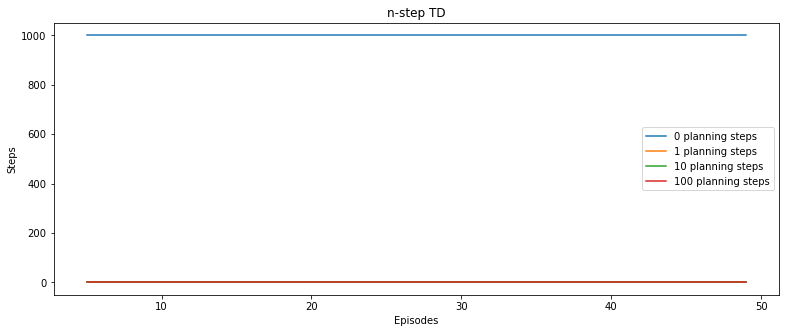

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))

for i , k_steps in enumerate(n_planning_steps):
    
    ax.plot(range(5,50), np.mean(steps_per_episode[i,:,5:50], axis=(0)).T, label = str(n_planning_steps[i]) + " planning steps" )
    
ax.legend()
ax.title.set_text("n-step TD")
ax.set_ylabel("Steps")
ax.set_xlabel("Episodes")